In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/NelakurthiSudheer/Mall-Customers-Segmentation/main/Dataset/Mall_Customers.csv")

In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.shape

(200, 5)

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
x= df.iloc[:,[3,4]].values

In [ ]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [ ]:
from sklearn.cluster import KMeans
wcss=[]

In [ ]:
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init="k-means++",random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

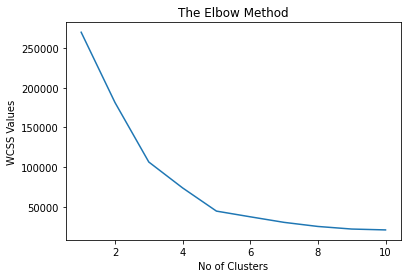

In [ ]:
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("No of Clusters")
plt.ylabel("WCSS Values")
plt.show()

In [ ]:
model=KMeans(n_clusters=5,init='k-means++',random_state=0)
y_kmeans=model.fit_predict(x)

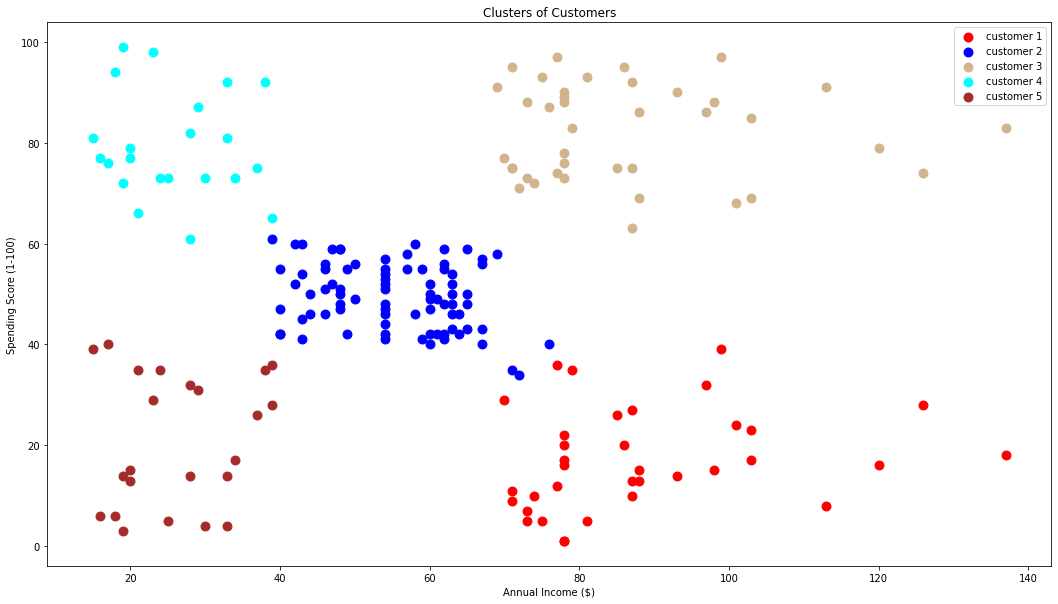

In [ ]:
plt.figure(figsize=(18,10))
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=80,c="red",label="customer 1")
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=80,c="blue",label="customer 2")
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=80,c="tan",label="customer 3")
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=80,c="aqua",label="customer 4")
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s=80,c="brown",label="customer 5")
# plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c="black",label="centroid",marker="*") 
plt.title("Clusters of Customers")
plt.xlabel("Annual Income ($)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

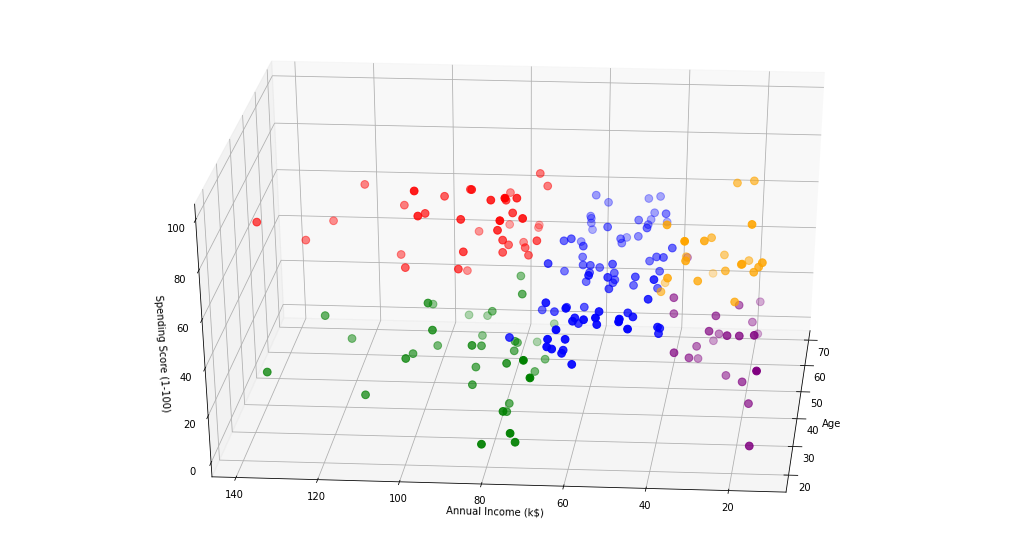

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
model1 = KMeans(n_clusters=5)
clusters = model1.fit_predict(df.iloc[:,2:])
df["label"] = clusters

fig=plt.figure(figsize=(18,10))
axis = fig.add_subplot(111, projection='3d')
axis.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
axis.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
axis.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
axis.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
axis.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
axis.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
axis.set_zlabel('Spending Score (1-100)')
plt.show()